In [ ]:
#This is a sentiment analysis program that parses the tweets from twitter using python

#import the libraries

In [ ]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re 
plt.style.use("fivethirtyeight")

In [ ]:
#Get the Twitter credentials Data
import json 

#Enter the keys as strings
credentials = {}

credentials['consumerkey']='XXX'
credentials['consumersecret']= 'XXX'
credentials['accesskey']='XXX'
credentials['accesskeysecret'] = 'XXX'

with open("twitter_credentials.json", "w") as file:
  json.dump(credentials, file)




In [ ]:
#Twitter API credentials
consumerkey=credentials['consumerkey']
consumersecret=credentials['consumersecret']
accesskey=credentials['accesskey']
accesskeysecret=credentials['accesskeysecret']



In [ ]:
#Create the Authentication Object
authenticate = tweepy.OAuthHandler(consumerkey, consumersecret)


#set the access token and the access token secret
authenticate.set_access_token(accesskey, accesskeysecret)

#create the API object while passing in the auth information.

api = tweepy.API(authenticate, wait_on_rate_limit=True)

In [ ]:
#I'm gonna be using my twitter account BillGates
#extract 100 tweets from my user

posts=api.user_timeline(screen_name = 'Ianmutuma_', count=100, lang='en', tweet_mode='extended')

#print the last 5 tweets from the accout
print("show the last 5 tweets: \n")
i=1
for tweet in posts[0:5]:
  print(str(i) + ') ' + tweet.full_text + '\n')
  i=i+1

show the last 5 tweets: 

1) https://t.co/quVQ3GWfuG  #IkoKaziKE

2) RT @JColeNC: Applying Pressure 
The Off-Season Documentary 

Dropping tomorrow at 1pm eastern. https://t.co/mfYX3AMqFu

3) aaah Cavani can't stop scoring man.

4) This https://t.co/2UU77Gl4Q9

5) @Bassam_KE Thanks to @MutuaAbel we know this.



In [ ]:
#create a dataframe with a column called Tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])

#Show the first 5 rows of data
df[:5]

,Tweets
0,https://t.co/quVQ3GWfuG #IkoKaziKE
1,RT @JColeNC: Applying Pressure \nThe Off-Seaso...
2,aaah Cavani can't stop scoring man.
3,This https://t.co/2UU77Gl4Q9
4,@Bassam_KE Thanks to @MutuaAbel we know this.


In [ ]:
#clean the text

#create a function to clean the data

#In the funtion we use Regular Expressions to remove what is not needed

def cleanTxt(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text)  #we are going to pick the patter in raw form and remove it. Removing the @mentions
  text = re.sub(r'#', '', text) # remove the hashtags
  text = re.sub(r'RT[\s]+', '', text)  # Remove the RT in retweeted tweets
  text = re.sub(r'https?:\/\/\S+', '', text) # Removes the hyperlink
  text = re.sub(r'(?<=\w\s)\n', '', text)

#to remove emoji
  EMOJI_PATTERN = re.compile(
    "(["
    "\U0001F1E0-\U0001F1FF"  # flags (iOS)
    "\U0001F300-\U0001F5FF"  # symbols & pictographs
    "\U0001F600-\U0001F64F"  # emoticons
    "\U0001F680-\U0001F6FF"  # transport & map symbols
    "\U0001F700-\U0001F77F"  # alchemical symbols
    "\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
    "\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
    "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
    "\U0001FA00-\U0001FA6F"  # Chess Symbols
    "\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
    "\U00002702-\U000027B0"  # Dingbats
    "])")

    #Thanks https://gist.github.com/mgaitan for above emoji removing code
  

  text = re.sub(EMOJI_PATTERN, r' \1 ', text)

  return EMOJI_PATTERN.sub(r' ', text)

  return text

#Now let's apply it on the dataframe

df['Tweets'] = df['Tweets'].apply(cleanTxt)

df.head()

,Tweets
0,IkoKaziKE
1,: Applying Pressure The Off-Season Documentary...
2,aaah Cavani can't stop scoring man.
3,This
4,_KE Thanks to we know this.


**TextBlob** returns **polarity and subjectivity** of a sentence. **Polarity** lies between [-1,1], -1 defines a negative sentiment and 1 defines a positive sentiment. Negation words reverse the polarity. TextBlob has semantic labels that help with fine-grained analysis. For example — emoticons, exclamation mark, emojis, etc. **Subjectivity** lies between [0,1]. Subjectivity quantifies the amount of personal opinion and factual information contained in the text. The higher subjectivity means that the text contains personal opinion rather than factual information. TextBlob has one more parameter — intensity. TextBlob calculates subjectivity by looking at the ‘intensity’. Intensity determines if a word modifies the next word. For English, adverbs are used as modifiers (‘very good’).

[Read More on Text Blob here](https://textblob.readthedocs.io/en/dev/)

In [ ]:
#create a function to get the subjectivity 

def getsubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# create a function to get the polarity 

def getpolarity(text):
  return TextBlob(text).sentiment.polarity

#create two new columns for subjectivity and polarity

df['Subjectivity'] = df['Tweets'].apply(getsubjectivity)
df['Polarity'] = df['Tweets'].apply(getpolarity)

#Display the dataframe with the two new columns created
df.head()

,Tweets,Subjectivity,Polarity
0,IkoKaziKE,0.0,0.0
1,: Applying Pressure The Off-Season Documentary...,0.0,0.0
2,aaah Cavani can't stop scoring man.,0.0,0.0
3,This,0.0,0.0
4,_KE Thanks to we know this.,0.2,0.2


Word cloud lets your create, yes, a cloud of words based on their context or repetition

[Word Cloud](http://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html)

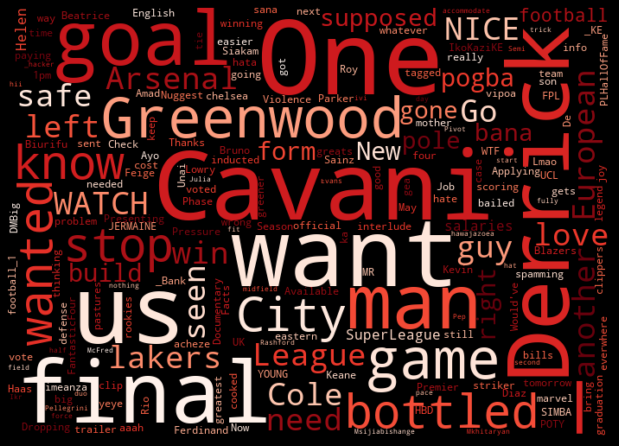

In [ ]:
#Plot a Word Cloud 

allwords = ''.join([tweets for tweets in df['Tweets']])
wordCloud = WordCloud(width=700, height = 500, random_state=42, max_font_size=120, colormap='Reds').generate(allwords)

plt.figure( figsize=(10,6), facecolor='k')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

In [ ]:
#create a function to compute the negative, neutral and positive analysis

def getAnalysis(score):
  if score < 0:
    return 'Negative'
  if score == 0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)

df.head()

,Tweets,Subjectivity,Polarity,Analysis
0,_ has a serious sleep disorder. He must f...,0.344444,-0.177778,Negative
1,_ Good morning gentlemen. How is the green a...,0.291667,0.091667,Positive
2,"Men,\n\n ️\n\nSHE IS NOT YOUR RELATIVE.\n\nM...",0.000000,0.000000,Neutral
3,"Men,\n\nNeutralize her energy.\n\nPenetrate he...",0.270833,-0.145833,Negative
4,Men and women who have been extracting money a...,0.000000,0.000000,Neutral


In [ ]:
#Print all of the positive tweets 

j=1

sortedDF = df.sort_values(by=['Polarity'])

for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') ' + sortedDF['Tweets'][i])
    print()
    j = j+1

1)  _  Good morning gentlemen. How is the green app?

I hope you guys trimmed _ big mouth. He can sometimes be an irritant together with his Man Utd cow 

2) Men,

Her relatives are not your relatives.

“ My brother in law is an IT graduate please get him some job for me.”

“ My wife’s cousin went with my car, I won't come today.”

Style up.

Prioritize your siblings FIRST!

SHE IS NOT YOUR RELATIVE.

Kumbaff!

MasculinitySaturday

3) Men,

Don't pedestalize her.

She wants you treat her as an average girl with flaws and weaknesses.

She wants to treat you as her KING.

If you worship her, she will lose respect and begin looking for a higher value man.

SHE IS NOT YOUR RELATIVE.

MasculinitySaturday

4) Men,

Take control of your relationship or marriage.

Take charge. Be the boss.

Close all loopholes and enforce boundaries.

Own the relationship. It is yours. 

Never allow your woman to lead the relationship.

Because, SHE IS NOT YOUR RELATIVE.

MasculinitySaturday

5) Men,

I can't 

In [ ]:
sortedDF

,Tweets,Subjectivity,Polarity,Analysis
48,_SHARIFF The worst.,1.000000,-1.000000,Negative
16,So disgusting.,1.000000,-1.000000,Negative
58,The skin is a reflection of your gut health.\n...,0.857143,-0.714286,Negative
40,_Drugz She unfortunately backslid.,1.000000,-0.500000,Negative
24,"Men,\n\nIf you treat your woman with kids glov...",0.541667,-0.458333,Negative
...,...,...,...,...
71,"Good morning, \n\nWhat is your favourite colog...",0.600000,0.700000,Positive
92,Ndugu was my very good friend. My neighbour ...,0.890000,0.755000,Positive
80,Welcome to my clinic.,0.900000,0.800000,Positive
43,Good luck!,0.600000,0.875000,Positive


In [ ]:
#Let's print the negative tweets

j = 1 

sortedDF = df.sort_values(by=['Polarity'], ascending=False)
for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i] == 'Negative'):
    print(str(i) + ') ' + df['Tweets'][i])
    print()
    j = j+1

0) _      has a serious sleep disorder. He must fix himself immediately. Has he stopped hiding 'last seen' on the green app?

3) Men,

Neutralize her energy.

Penetrate her so hard with the ruthlessness of a witch.

Leaving her with excess feminine energy is what makes her grumpy, moody or online at midnight. 

Your woman should NOT be online after 10 PM.

SHE IS NOT YOUR RELATIVE. 

MasculinitySaturday

5) Men,

SHE IS NOT YOUR RELATIVE.

She left her brothers to come to be with you.

Penetrate her so hard.

Don't be a soft, jellyfish in bed.

Make her feel feminine. Deflate all her energy.

DOMINATE. 

MasculinitySaturday

11) Men,

Once she starts sending you texts like
“ ...now you are treating me as an option. Just know one day you will miss me.”

It means you have refused to be manipulated.

She is testing the resilience of your frame.

Be firm.

SHE IS NOT YOUR RELATIVE.

MasculinitySaturday

13) Men,

I hope the fridge, TV, beds, cooker, sofas, curtains, carpets belong to you.


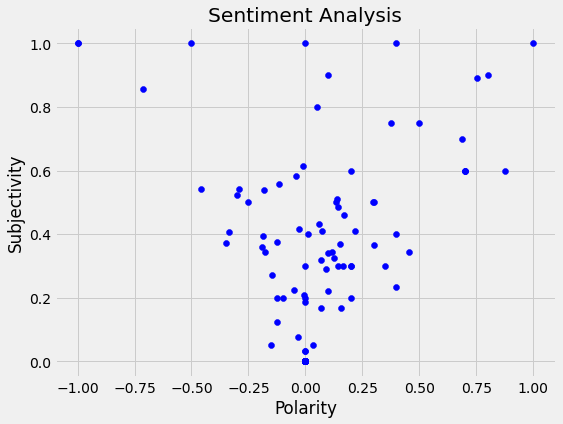

In [ ]:
# plot polarity and subjectivity

plt.figure(figsize=(8,6))

for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color = 'Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [ ]:
# get the percentage of the positive tweets

ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']


round((ptweets.shape[0] / df.shape[0]) *100 , 1)

44.0

In [ ]:
# Get the percentage of the negative tweets

ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']

round((ntweets.shape[0]/ df.shape[0]) *100, 1)

27.0

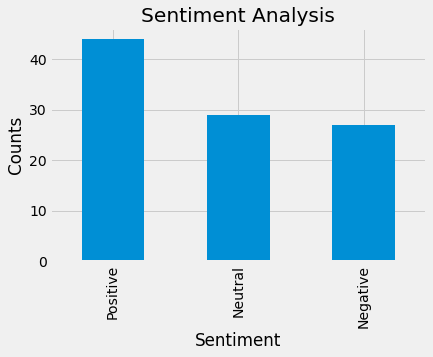

In [ ]:
# Show the Value counts

df['Analysis'].value_counts()

#plot and Visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()